In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats

## import csc to dataframe
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# define chi-square check function
def my_chisquare(df,col1,col2,dp=3.841):
# create contingency table
    df_crosstab = pd.crosstab(df[col1],
                                df[col2],
                               margins=True, margins_name="Total")
    print(df_crosstab)
    df_crosstab = pd.crosstab(df[col2],
                                df[col1],
                               margins=False)
    d1=list(df_crosstab[0])
    d2=list(df_crosstab[1])
    from scipy.stats import chi2_contingency
    # defining the table
    data = [d1, d2]
    stat, p, dof, expected = chi2_contingency(data)
    print('chi-square value is {}'.format(stat))
    print('df is {} and dp is {}'.format(dof,dp))
    # interpret stat vs expected
    if stat > dp:
        print('Dependent (reject H0)')
    else :
        print('Independent (H0 holds true)')
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')



In [8]:
# A - extracting class info, plot and chi-square

df_class=df.loc[:,['Survived','Pclass']]

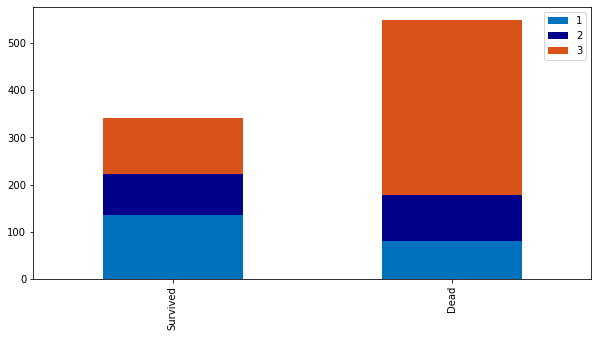

In [19]:
survived_class = df_class[df_class['Survived']==1]['Pclass'].value_counts()
dead_class = df_class[df_class['Survived']==0]['Pclass'].value_counts()
temp_df = pd.DataFrame([survived_class,dead_class])
temp_df.index = ['Survived','Dead']
temp_df.plot(kind='bar',stacked=True, figsize=(10,5), color=['#0072BD','darkblue','#D95319'])
plt.savefig('class_bar.png')

In [39]:
dp=5.991
my_chisquare(df_class,'Survived','Pclass',dp)

Pclass      1    2    3  Total
Survived                      
0          80   97  372    549
1         136   87  119    342
Total     216  184  491    891
chi-square value is 102.88898875696056
df is 2 and dp is 5.991
Dependent (reject H0)
p value is 4.549251711298793e-23
Dependent (reject H0)


In [11]:
# B - extracting Gender info, plot and chi-square

df_gender=df.loc[:,['Survived','Sex']]

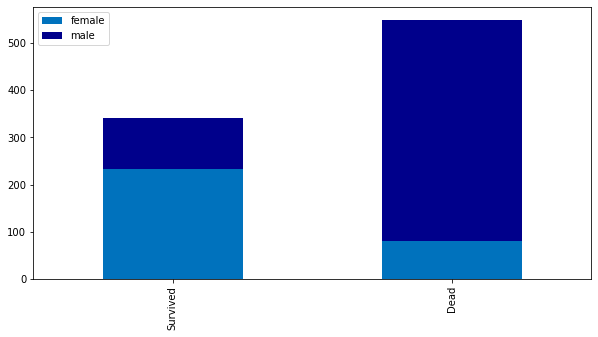

In [12]:
survived_gender = df_gender[df_gender['Survived']==1]['Sex'].value_counts()
dead_gender = df_gender[df_gender['Survived']==0]['Sex'].value_counts()
temp_df = pd.DataFrame([survived_gender,dead_gender])

temp_df.index = ['Survived','Dead']

temp_df.plot(kind='bar',stacked=True, figsize=(10,5), color=['#0072BD','darkblue'])
plt.savefig('gender_bar.png')

<AxesSubplot:>

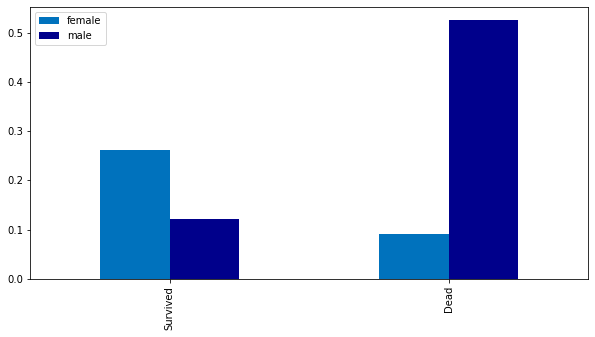

In [13]:
survived_gender = df_gender[df_gender['Survived']==1]['Sex'].value_counts()/891
dead_gender = df_gender[df_gender['Survived']==0]['Sex'].value_counts()/891
temp_df = pd.DataFrame([survived_gender,dead_gender])

temp_df.index = ['Survived','Dead']

temp_df.plot(kind='bar',stacked=False, figsize=(10,5), color=['#0072BD','darkblue'])


In [14]:
dp=3.841
my_chisquare(df_gender,'Survived','Sex',dp)

Sex       female  male  Total
Survived                     
0             81   468    549
1            233   109    342
Total        314   577    891
chi-square value is 260.71702016732104
df is 1 and dp is 3.841
Dependent (reject H0)
p value is 1.1973570627755645e-58
Dependent (reject H0)


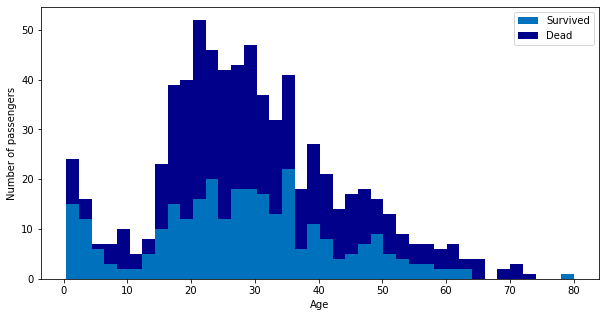

In [15]:
# C extract Age info, drop null, plot histogram and perform t test

df2=df.loc[:,['Survived','Age']]
df_Age=df2.dropna()
survived_Age = df_Age[(df_Age['Survived']==1)]['Age']
dead_Age = df_Age[(df_Age['Survived']==0)]['Age']

figure = plt.figure(figsize=(10,5))
plt.hist([survived_Age,dead_Age],bins=40,stacked=True,label=['Survived','Dead'], color=['#0072BD','darkblue'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.savefig('age_hist.png')

In [17]:
stats.ttest_ind(df_Age['Age'][df_Age['Survived'] == 0],
                df_Age['Age'][df_Age['Survived'] == 1])

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

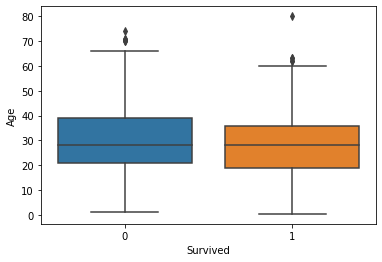

In [16]:
# experiment on seaborn box plot
sns.boxplot(x="Survived", y="Age", data=df_Age)